# Zeitreihenanalysen mit R


In diesem Abschnitt werden grundlegende Definitionen zum näheren Verständnis der Zeitreihenanalyse gegeben. Die Zeitreihenanalyse ist ein sehr mathematisch geprägtes Feld der deskriptiven Statistik und breit gefächert. Zudem kann die Analyse von Zeitreihen  eine gewisse Tiefe vorweisen. Im Folgenden wird deshalb nur eine Einführung in die zentralen Komponenten und Konzepte der Zeitreihenanalyse gegeben. Für eine tiefgreifendere Auseinandersetzung wird an dieser Stelle auf die am Ende dieses Kapitels benannten Literaturquellen verwiesen.

Es müssen zunächst einige zentrale Definitionen gegeben und Begriffsabgrenzungen gemacht werden.

### Grundlegende Definitionen und Prozesse

Unter einem stochastischen Prozess versteht man eine Folge $(Y_t)$ von Zufallsvariablen. Der Index $t$ wird hier als die Zeit aufgefasst.  **Eine Zeitreihe ist eine (geordnete) Folge von $ y_1,...,y_n $ von Realisationen eines Ausschnittes von $(Y_t)$ Beobachtungen.** Man nennt diese oft auch *Zeitpfad* oder *Trajektorie* des Prozesses.
Ein wichtiges Charakteristikum stellt hierbei die Unabhängigkeit der Beobachtungen dar. Zudem sollten die Beobachtungen $ y_{t1},...,y_{tk}  \in Y_t$  äquidistant sein.

Weiterhin werden ein *White-Noise-Prozess* (s. auch [Wikipedia](https://de.wikipedia.org/wiki/Wei%C3%9Fes_Rauschen)), sowie die *Normalverteilung* vorausgesetzt. Unter einem White-Noise-Prozess versteht man eine Folge von unabhängigen und identisch verteilten (Zufalls-)Variablen. Bei Zufallsprozessen, zu welchen auch der *Random Walk* zählt, spricht man auch von Zufallsvariablen ($\epsilon_t$).

Die Analyse von Zeitreihen hat das Ziel, Strukturen und Regelmäßigkeiten in Zeitreihen aufzuspüren und zur Beschreibung und Modellierung auszunutzen. 

Zeitreihenanalysen eignen sich für folgende Anwendungsbereiche:

| Anwendungsfeld | Beispiel            |
| :------------- |:-------------|
|Beschreibung| **Komponentenmodell** |
|Interpretation|**Saisonbereinigung**|
|Prognose|**Verkaufs-/Umsatzzahlen im kommenden Quartal**|
|Kontrolle|Kontrolle eines Produktionsprozesses|
|Hypothesentest|Überprüfung von Hypothesen: *Gibt es die Globale Erwärmung?*|
|Simulation|Simulation verschiedener Szenarien, z.B. Preisveränderung|



## Theoretischer Hintergrund

Zunächst soll das Rahmenwerk, welches zum tieferen Verständnis der Zeitreihenanalyse erforderlich ist, erläutert werden. Hierbei wird auf den oben genannten Begriffsklärungen aufgebaut. Darauffolgend soll eine beispielhafte Analyse durchgeführt werden. Diese wird in einzelnen Phasen strukturiert durchgeführt.

### Stationarität und Ergodiszität

Eine grundlegende Annahme bei der Zeitreihenanalyse ist die *Stationarität*. Hierunter versteht man die Eigenschaft, dass sich die stochastischen Charakteristika über die Zeit nicht ändern. Eine Zeitreihe ist stationär, wenn sich die grundlegenden Charakteristika (Mittelwerte, Varianzen, etc.) über die Zeit nicht wesentlich voneinander abweichen. Ist die Stationarität anfangs nicht gegeben, so muss diese zunächst hergestellt werden. Dies geschieht durch das Bilden von Differenzen oder durch Logarithmieren. 
Man erhält eine stationäre Zeitreihe durch das Bilden der ersten oder ggf. weiteren Differenzen. Unter der Differenzbildung versteht man die Berechnung der Wertveränderung zwischen zwei Beobachtungen, also $$y'_t = y_t - y_{t-1}$$
Ist der gegebene Prozess bereits stationär, so spricht man von einem Prozess, welcher vom Grad *null* integriert ist ($I(0)$). Ist dies nicht der Fall, so sind es die ersten Differenzen $\Delta Y_t = Y_t - Y_{t-1}$. Der Prozess weist somit den Grad *eins* auf. Bei ökonoischen Zeitreihen, wie sie auch hier behandelt werden, genügt meist ein Grad eins ($I(1)$) zur Herstellung der Stationarität.

Für die Überprüfung stehen verschiedene *Einheitswurzeltests*, wie zum Beispiel der [*Augmented Dickey-Fuller* Test](https://de.wikipedia.org/wiki/Dickey-Fuller-Test) zur Verfügung.

</br>


Eine weitere Voraussetzung ist die *Ergodiszität*. Hierunter versteht man grob gesagt die Forderungen, dass sich alle Charakteristika der Verteilung je endlich vieler Zufallsvariablen $y_{t1},...,y_{tk}$ konsistent schätzen lassen. Hierbei geht es konkret um die aus dem zeitlichen Verlauf bestimmten Größen, wie Varianz und Kovarianz sowie auch Erwartungswerte.

### Wichtige Modelle - Ein Überblick

| Modell |            |
| :------------- |:-------------|
|Autoregressive Prozesse                            |(**AR**-Prozess)   |
|Moving Average Prozesse                            |(**MA**-Prozess)   |
|Autoregressive Moving Average Prozesse             |(**ARMA**-Prozess) |
|Autoregressive Integrierte Moving Average Prozesse |(**ARIMA**-Prozess)|

### Das Komponentenmodell

Ein Komponentenmodell ist ein grundlegender Schritt bei der Analyse von Zeitreihen. Für ein Komponentenmodell wird die nicht-stationäre Ausgangszeitreihe in die Bestandteile Trend-, Saison-, Zyklische sowie die Irreguläre Komponente (Random) zerlegt. Ziel ist es, die genauen Bestandteile und Einflussgrößen näher betrachten zu können. So kann beispielsweise bei Produktabsatzzahlen ein (meist) linearer Trend beobachtet werden. Weiterhin unterliegt der Absatz sehr wahrscheinlich saisonalen Einflüssen wie Schulferien und bestimmten Jahreszeiten (z.B. Weihnachtsgeschäft). Die Zyklische Komponente (auch *Kalenderkomponente*) stellt bei ökonomischen Zeitreihen meist noch den Konjunkturzyklus als Einflussgröße dar. Unter dem irregulären Rest versteht man den nicht durch die vorangegangenen Komponenten erklärbare, auf stochastischen Prozessen (s.o.) beruhende Einflüsse auf die Zeitreihe. Im Idealfall liegt hier ein White-Noise- oder Random-Walk-Prozess vor.

Grundsätzlich unterstellt man einer (ökonomischen) Zeitreihe eine Zerlegung nach additiver oder multiplikativer Form, wobei $$ Y_t = T_t + S_t + \epsilon_t  \text{(Additiv)}$$ 
$$ Y_t = T_t \cdot S_t \cdot \epsilon_t \text{(Multiplikativ)}$$ 
bezeichnet wird.


#### Trend

Unter einem Trend wird zunächst eine Grundentwicklung von Beobachtungen über die Zeit verstanden. Zur Bestimmung eines Trends wird in erster Linie die bereits bekannte lineare Regression verwendet.
Bei Zeitreihen, welche unter dem Einfluss einer oder mehrerer saisonaler (z.B. Jahreszeiten) und zyklischer Einflüsse (z.B. Konjunktur) stehen, gestaltet sich die Ermittlung eines deterministischen Trends durch die teils erheblichen Schwankungen (Trendbrüche) als schwierig. Für diesen erweiterten Rahmen wird der Trend ökonomischer Zeitreihen oft auch als *glatte Komponente* bezeichnet. Die glatte Komponente $G_t$ unterscheidet sich vom gewöhnlichen deterministischen Trend durch die Berücksichtigung des Zyklus $Z_t$; somit ergibt sich die Gleichung: 
$$G_t = T_t + Z_t$$

Bei der Bestimmung der glatten Komponente hat sich hier die Methodik der gleitenden Durchschnitte (Moving Averages) durchgesetzt. Die Methode der gleitenden Durchschnitte zählt zur Kategorie der *linearen Filter*. Hierbei wird der deterministische Trend durch lokale Mittelwerte geschätzt. Hierbei werden arithmetische Mittelwerte zu vordefinierten Segmentgrößen ermittelt und einem bestimmten Zeitpunkt zugeordnet. Hierbei wird die Segmentgrße $d$ stets *ungerade* gewählt. Gleitende Durchschnitte werden folgendermaßen berechnet: $$ \sum_{t=s+1}^{s+d}\frac{y_t}{d} $$

Wobei $d$ die Segmentgröße darstellt. Somit wird der Mittelwert dem Zeitpunkt $s+\frac{d+1}{2}$ zugeordnet.

Eine weitere Möglichkeit zur Interpolation der glatten Komponente bieten [Splines](https://de.wikipedia.org/wiki/Spline-Interpolation), welche an dieser Stelle aber nicht näher betrachtet werden.

#### Saison

Die Saison ist als ein periodisch wiederkehrendes Phänomen definiert. Saisonale Einflüsse können je nach Granularität einer Beobachtungungsreihe wöchentlich, monatlich oder quartals- bzw. jahresweise auftreten. Ebenso kann die Jahreszeit die Beobachtungen beeinflussen. In einer Zeitreihe können mehrere saisonale effekte auftreten.
Bei der Zerlegung öhonomischer Zeitreihen spielt die Saisonbereinigung, also das herausrechnen dieser wiederkehrenden Größe, eine wichtige Rolle. In der retrospektiven Komponentenzerlegung dient die Saisonbereinigung dem Ziel einer besseren und klareren Einschätzung der momentanen Situation.

Wichtige Saisonbereinigungsverfahren sind das *Berliner Verfahren* (BV4.1), *X-12 ARIMA*, sowie *CENSUS X-11*. Diese Modelle werden für die makroökonomischen Analysen des Statistischen Bundesamtes und dergleichen in aller Welt angewandt.

Diese Modelle sind sehr speziell und in an dieser Stelle nicht darstellbar. Es reicht (für uns) diese Modellbezechnungen und deren Existenz zu kennen.

### Autokorrelationsfunktion ACF

Die Autokorrelationsfunktion hilft uns, Zeitreihen tiefergehend zu analysieren und ggf. Muster zu erkennen. Der Plot einer ACF ist ein wichtiger Bestandteil zur Bestimmung der nachfolgenden Modelle.

Für die ACF muss die Zeitreihe (mindestens) eine schwache Stationarität aufweisen. Diese ist gegeben, wenn:
* der durchschnittliche **Erwartungswert** $E(y_t)$,
* die **Varianz** von $y_t$,
* die **Kovarianz** $COV(y_t, y_{t-i})$ und **Korrelation** $COR(y_t, y_{t-i})$ für $i = {1,2,3,...}$ zwischen $y_t$ und $y_{t-1}$ <br>
<br>
für alle $t$ ungefähr dieselbe ist.



### Autoregressive Modelle (AR)

Das grundlegende Bestreben bei einer Zeitreihenanalyse ist das Erklären und Verstehen der Zeitreihen. Bei Autoregressiven Prozessen (bzw. Modellen) wird angenommen, dass sich die Ausprägung eines Wertes $Y_t$ aus den vorhergegangenen Werten $y_{t-1}...y_{t-n}$ der Zeitreihe ergeben. Man kann somit folgende Funktion unterstellen:
$$ Y_t = f(y_{t-1}...y_{t-n}) + \epsilon_t$$

Hierbei beruht die Funktion $f$ auf einer Linearkombination der zeitlich vorangegangenen Werte. Dies erfolgt bis zu einem sinnvoll begründeten Vergangenheitshorizont. Das autoregressive Modell wird somit durch folgende Gleichung festgelegt:
$$ Y_t = \alpha_0 + \alpha_1 Y_{t-1}+...+\epsilon_t$$

>Ein autoregressiver Prozess erster Ordnung (AR(1)), ist demzufolge ein stochastischer Prozess, dessen Realisation im Zeitpunkt $t$, $Y_t$, nur von seiner mit $\alpha_1$ gewichteten Realisation im Zeitpunkt $Y_{t-1}$ und einem weißen Rauschen $\epsilon_t$ abhängt, d.h. $ Y_t = \alpha_0 + \alpha_1 Y_{t-1}+\epsilon_t$ gilt. (vgl. [Gabler Wirtschaftslexikon](http://wirtschaftslexikon.gabler.de/Definition/ar-p-prozess.html))

Die entscheidende Größe für die Charakterisierung der Eigenschaften von AR-Prozessen ist die Autokorellationsfunktion, kurz [ACF](https://de.wikipedia.org/wiki/Autokorrelation).

Um die Ordnung $p$ eines AR-Prozesses zu bestimmen kann im Plot der Autokorrelationsfunktion nach einem bestimmten Muster 'gesucht' werden. Folgendes Charakteristikum gilt beispielsweise für einen AR(p)-Prozess:
* ACF klingt nach Lag $p$ exponentiell ab.

Weiterhin gibt es die Möglichkeit, die Ordnung $p$ eines AR-Prozesses mit der Hilfe eines Informationskriteriums sukzessive (durch ausprobieren) zu ermitteln. Hierzu gibt es beispielsweise das [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion) (* **A**kaike **I**nformation **C**riterion*).

### Moving Average Modelle (MA)

Die MA-Prozesse gehören zu einer anderen Gattung als die AR-Prozesse. MA-Prozesse beziehen sich nicht auf die vergangenen Werte von $Y_t$ sondern auf die zurückliegenden Störungen $\epsilon_t$. Es ergibt sich somit folgende, charakteristische Gleichung:$$ Y_t = \epsilon_t - \epsilon{t-1}+...+\epsilon_{t-q}$$ wobei $q$ die Ordnung des Prozesses angibt. Im Gegensatz zu AR-Prozessen wird hier lediglich eine Summe gewichteter Zufallsvariablen gebildet. Somit sind MA-Prozesse stets (schwach) stationär.

Um die Ordnung $q$ eines MA-Prozesses zu bestimmen kann im Plot der Autokorrelationsfunktion, sowie der partiellen Autokorrelationsfunktion nach einem bestimmten Muster 'gesucht' werden. Folgende Charakteristika gelten für MA(q)-Prozesse:
* ACF verschwindet für Lags $\tau$, welche größer als die Ordnung des Prozesses sind.
* PACF ist für $\tau$ > $q$ exponentiell abklingend.

### Autoregressive Integrierte Moving Average Modelle (ARIMA)

Das Autoregressive Integrierte Moving Average Modell, kurz ARIMA, besteht aus den drei, uns bereits bekannten, Komponenten: Der Grad der Differenz $d$, dem AR(p)-Modell und dem MA(q)-Modell. Man spricht vor diesem Hintergrund auch von ARIMA(p,d,q)-Modellen. Dieses Modell geht auf [Box und Jenkins](https://en.wikipedia.org/wiki/Box%E2%80%93Jenkins_method) zurück und ist eine Erweiterung des ARMA-Modells. Die Erweiterung besteht im Wesentlichen darin, dass für ARIMA-Modelle keine Stationarität vorausgesetzt wird. Die Zeitreihe kann also bewusst eine Trendkomponente beinhalten.
In der Erweiterung SARIMA (S steht für seasonal) wird das eigentliche Modell noch um eine Saisonkomponente erweitert und ermöglicht somit neue Freiheitsgrade.

Die Grade $p$,$d$,$q$ können mit Hilfe der [*Box-Jenkins Methode*](https://en.wikipedia.org/wiki/Box%E2%80%93Jenkins_method) fundiert geschätzt und daraus resultierende Modell letztlich mittels Informationskriterien (*AIC*,*BIC*) evaluiert werden.

## Praktischer Hintergrund

Für die Zeitreihenanalyse werden wir die Pakete [forecast](https://cran.r-project.org/web/packages/forecast/ "forecast"), [tseries](https://cran.r-project.org/web/packages/tseries/ "tseries") verwendnen. Weiterhin soll [ggplot2](https://cran.r-project.org/web/packages/ggplot2/ "ggplot2") zur Visualiserung herangezogen werden. Im Nachfolgenden soll das theoretisch Besprochene am Beispiel des **bike sharing** Datensatzes veranschaulicht werden. Der Datensatz stammt aus dem frei zugänglichen Repository des [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset# "UCI").

Als Referenz dient für die folgenden Schritte die Analyse von [datascience.com](https://www.datascience.com/blog/introduction-to-forecasting-with-arima-in-r-learn-data-science-tutorials), welche die Grundalge für weitere Analysen in diesem Notebook bildet.


> Folgende Pakete werden benötigt: Diese müssen gegebenenfalls zunächst installiert werden, da nicht alle im Standard enthalten sind.
In Windows-Kommandozeile:>> conda install r-forecast (Die Installation von forecast bringt automatisch auch tseries mit)

In [1]:
library('zoo')      #benötigt von ggplot2
library('timeDate') #benötigt von ggplot2

library('ggplot2')
library('forecast')
library('tseries')


bikes = read.csv('daten/Bike-Sharing-Dataset/day.csv', header=TRUE, stringsAsFactors=FALSE)


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'ggplot2' was built under R version 3.3.3"This is forecast 7.3 



#### Phase 1: Erste Überprüfung der Zeitreihe

Im ersten Schritt müssen wir den ursprünglichen Datensatz um einen Tag erweitern. Hierdurch wird uns die weitere Arbeit mit dem Datensatz durch einfaches Parsen (Funktion as.Date) erleichtert.

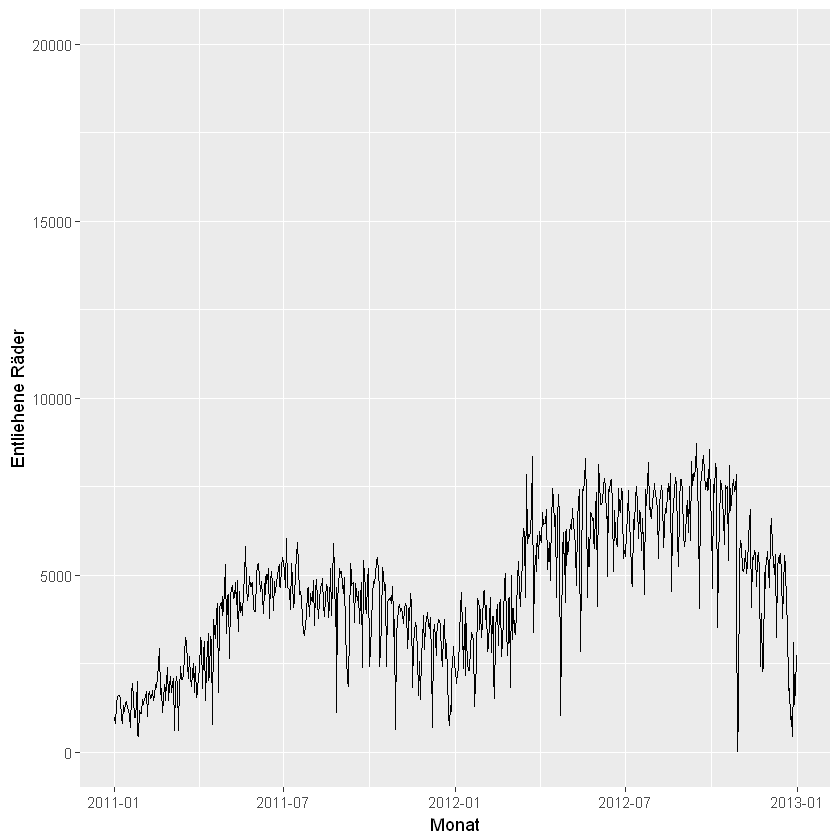

In [3]:
bikes$Date = as.Date(bikes$dteday) #notwendig um Datenformat 'Date' zu erhalten.

ggplot(bikes, aes(Date, cnt)) + geom_line() + scale_x_date('Monat')  + ylab("Entliehene Räder") +
            xlab("") + scale_y_continuous(limits = c(0, 20000))

Dem Plot kann man folgende Charakteristika entnehmen:
* Der Datensatz repräsentiert eine womöglich **markant saisonal** geprägte Zeitreihe.

* Der Datensatz weist einen **positiven Trend** über den abgebildeten Zeitraum (2011-2013) auf.

* Der Datensatz zeigt **teils erhebliche Schwankungen/Ausschläge**, vor Allem in der rechten Hälfte auf.

* Der Datensatz gibt zudem Hinweise auf **mögliche Fehlmessungen im Mai-2012 und Oktober-2013.**


Diesen enormen negativen Ausschlag im Oktober 2013 sollten wir uns einmal genauer ansehen. Durch die manuelle Suche konnten wir diesen auf die letzte Oktoberwoche eingrenzen:

In [4]:
bikes[666:670, c("cnt")]

[1] 7852 4459   22 1096 5566

Wie wir hier sehr deutlich sehen können, muss es sich hier um eine Fehlmessung und somit um einen Ausreisser handeln. Da wir keine weiteren Informationen diesbezüglich haben, werten wir den Datensatz 668 als Ausreisser. Hier wäre zur absolut korrekten Interpretation eine Nachfrage im Fachbereich angebracht. 

Im Paket tseries gibt es für diese Aufgabe die Methode tsclean(). 


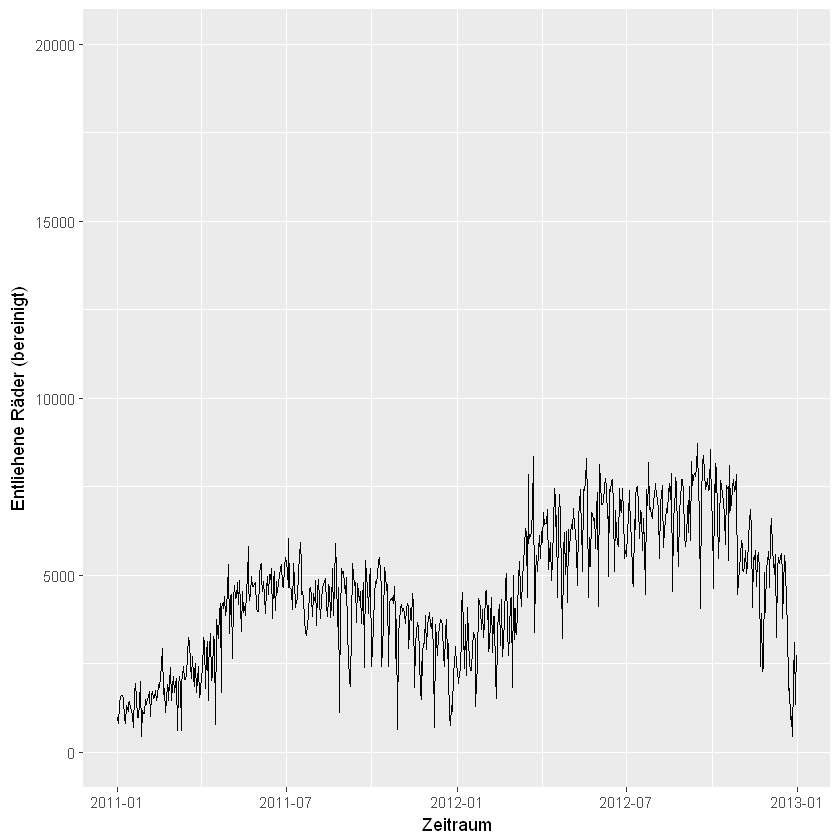

In [9]:
bikes_ts = ts(bikes[, c('cnt')])

bikes$clean_cnt = tsclean(bikes_ts)

ggplot()+ geom_line(data = bikes, aes(x = Date, y = clean_cnt)) + xlab('Zeitraum') + ylab('Entliehene Räder (bereinigt)') + scale_y_continuous(limits = c(0, 20000))

Wir können mithilfe eines Histogramms die Verteilung der einzelnen Residuen untersuchen. Unsterstellen wir unserer Zeitreihe einen stochastischen Prozess (s. auch [Wikipedia](https://de.wikipedia.org/wiki/Wei%C3%9Fes_Rauschen)), so können wir anhand der Verteilung weitere Eigenschaften erkennen. Man kann relativ einfach erkennen, dass hier eine Normalverteilung vorliegt. Als Referenz dient die *Gaußsche Glockenkurve*.

In [ ]:
h = hist(bikes$cnt, breaks = 25, ylab = 'Frequency of Rental', xlab = 'Total Bike Rental Count', main = 'Distribution of Total Bike Rental Count', col = 'blue')

xfit <- seq(min(bikes$cnt),max(bikes$cnt), length = 50)
yfit <- dnorm(xfit, mean =mean(bikes$cnt),sd=sd(bikes$cnt))
yfit <- yfit*diff(h$mids[1:2])*length(bikes$cnt)
lines(xfit,yfit, col='red', lwd= 3)

Als nächstes werden wir die Zeitreihe um die teils erheblichen Ausschläge und Schwankungen ausgleichen. Dies ist notwendig um bessere Vorhersagen zu machen. In diesem Zusammenhang haben sich die **gleitenden Durchschnitte** (Moving Average, MA) bewährt. Wir wenden im Folgenden die Funktion **ma()** aus dem Paket tseries an.

Für die vorliegende Zeitreihe bieten sich aufgrund des beschränkten Beobachtungszeitraums von 2 Jahren nur die gleitenden Durchschnitte der Ordnung 7 (Kalenderwoche) und 30 (Kalendermonat) an. Wäre der Beobachtungszeitraum beispielsweise 10 Jahre lang, so wäre auch eine Ordnung 365 (also ein Jahr) denkbar.

Warning message:
"Removed 6 rows containing missing values (geom_path)."Warning message:
"Removed 30 rows containing missing values (geom_path)."

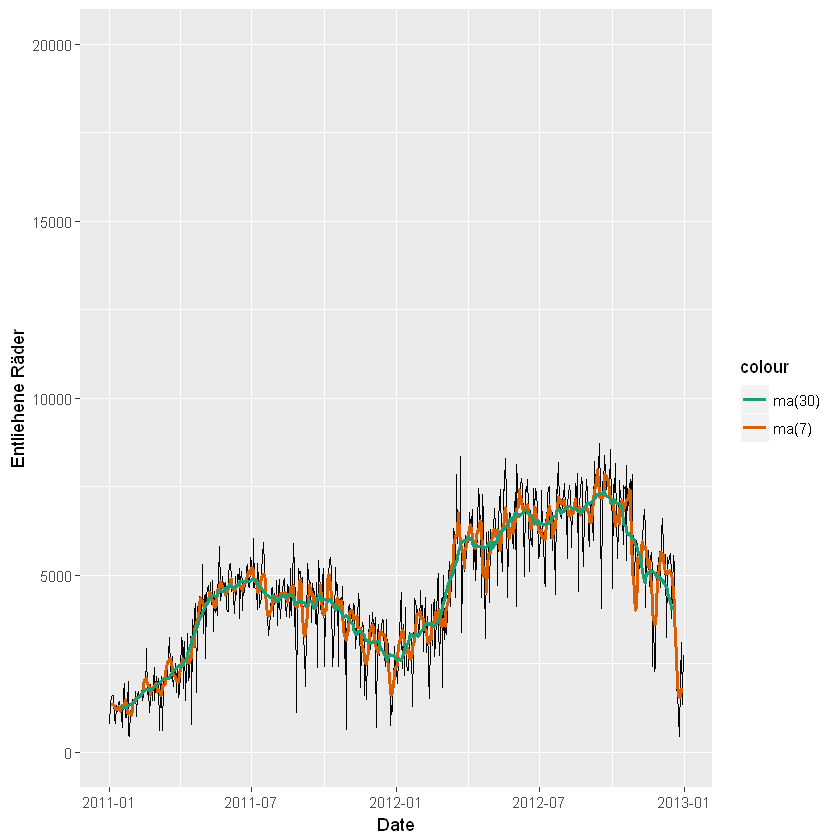

In [10]:
bikes$cnt_ma = ma(bikes$cnt, order=7)
bikes$cnt_ma30 = ma(bikes$cnt, order=30)


ggplot(colour = "black") +
  geom_line(data = bikes, aes(x = Date, y = clean_cnt)) + 
  geom_line(data = bikes, aes(x = Date, y = cnt_ma, colour = "ma(7)"), size = 1)    +
  geom_line(data = bikes, aes(x = Date, y = cnt_ma30, colour = "ma(30)"), size = 1) +
  ylab('Entliehene Räder') + scale_y_continuous(limits = c(0, 20000)) +  scale_color_brewer(palette="Dark2")

Im folgenden entscheiden wir uns für die glattere Variante des ma(30).

<br>

#### Phase 2: Die Komponentenzerlegung

Als nächstes werden wir die Komponentenzerlegung durchführen. Hier wird die Zeitreihe in die Bestandteile Trend, Saison und den zufälligen Rest zerlegt. Durch die Zerlegung können wir einen tieferen Einblick in die Zeitreihe nehmen und diese schlißelich besser verstehen. Die Komponentenzerlegung bildet die Grundlage für die Wahl des richtigen Prognosemodells.

Mit Hilfe der Funktion **seasadj()** aus dem Paket forecast können wir auf einfache Weise die Saisonbereinigung durchführen. Hierbei wird die Saison aus dem Komponentenmodell von der ursprünglichen Zeitreihe subtrahiert.

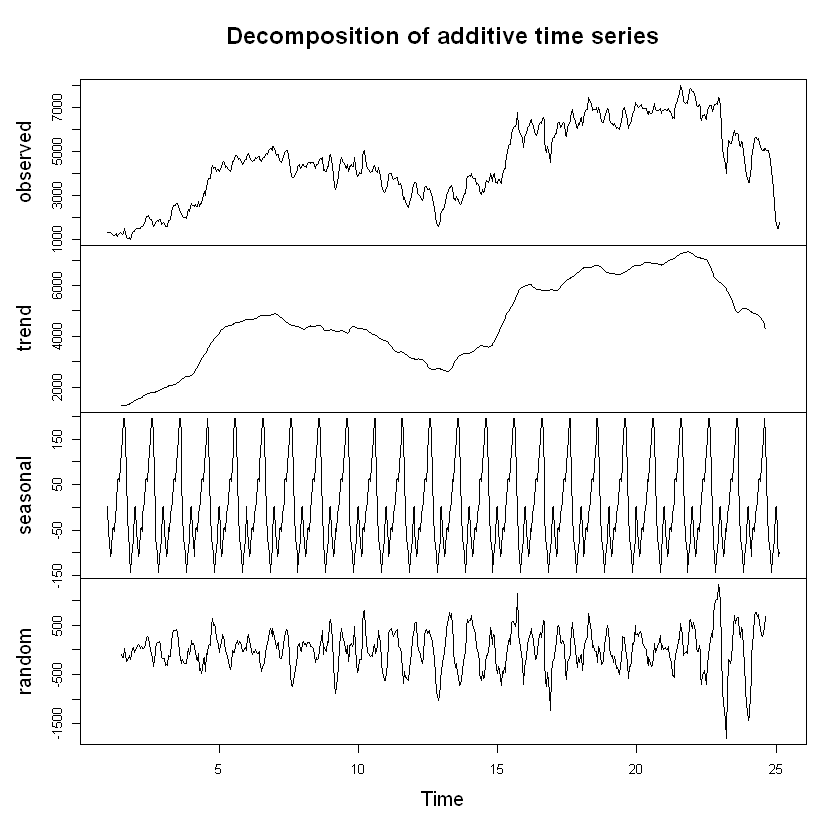

In [11]:
count_ma = ts(na.omit(bikes$cnt_ma), frequency=30)
decomp = decompose(count_ma)
deseasonal_cnt = seasadj(decomp)
plot(decomp)


Für unser gewünschtes Prognosemodell (ARIMA) wird, wie bereits im theoretischen Teil genannt, auch die Stationarität der Zeitreihe vorausgesetzt. Ein geschultes Auge kann meist aus dem ursprünglichen Plot erkennen, ob die Zeitreihe Stationarität aufweist.
Zur sicheren Überprüfung gibt es sogenannte Einheitswurzeltests. Diese führen einen Hypothesentest auf der gegebenen Reihe aus.

Wir wenden hier den Augmented Dickey-Fuller Test (ADF) Test an. Hierbei übergeben wir unser Zeitreihenobjekt und legen die Alternativ-Hypothese "stationarity" fest. Beim ADF-Test wird somit mit H0 die nicht-stationarität angenommen und überprüft. Im besten Fall gibt uns dieser Test dann eine sehr niedrige Wahrscheinlichkeit (s. p-value) aus. (p-value bewegt sich zwischen 0 und 1!)

In [12]:
adf.test(count_ma, alternative = "stationary")


	Augmented Dickey-Fuller Test

data:  count_ma
Dickey-Fuller = -0.64299, Lag order = 8, p-value = 0.9753
alternative hypothesis: stationary


#### Phase 3: Herstellen der Stationarität

Zunächst müssen wir die Stationarität unserer Zeitreihe herstellen. Hierbei greifen wir auf die bereits saisonbereinigte Zeitreihe deaseasonal_cnt zurück. Die Herstellung der Stationarität wird durch geeignetes Transformieren hergestellt. Im Wesentlichen geschieht das durch die bereits erwähnte Differenzenbildung. Hierfür gibt es die Funktion **diff()** aus dem Paket forecast.

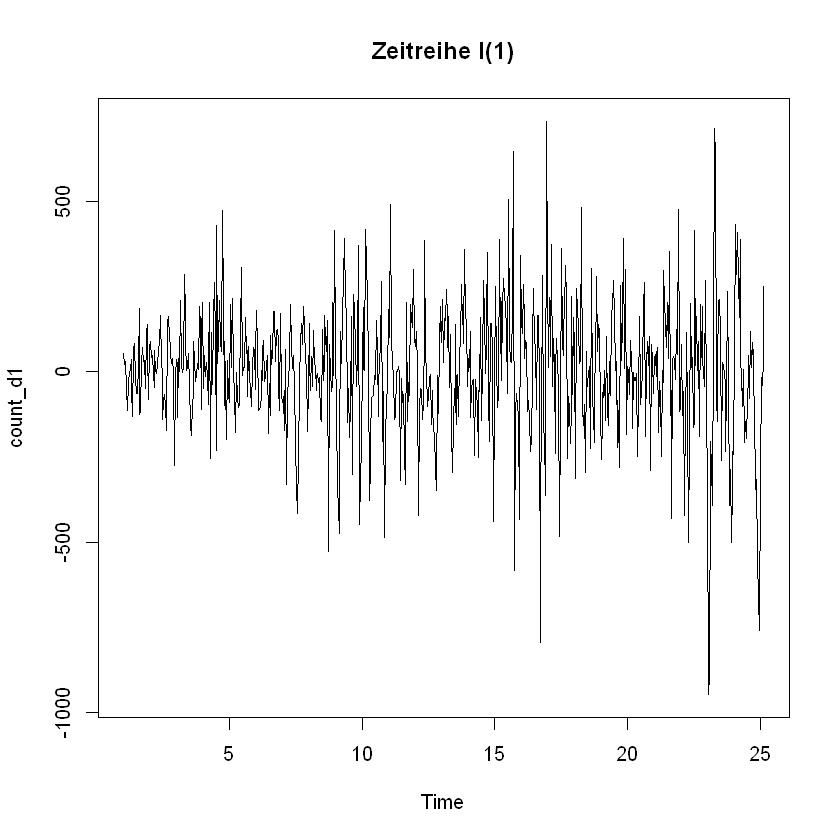

In [27]:
count_d1 = diff(deseasonal_cnt, differences = 1)
plot(count_d1,  main = "Zeitreihe I(1)")

Nach der Transformation wenden wir erneut den ADF-Test an. Hierdurch soll überprüft werden, ob die Stationarität durch die einfache Differenzenbildung erfolgreich hergestellt werden konnte. Sollte hier weiterhin die Hypothese der Nicht-Stationarität gestützt werden, so ist womöglich eine nochmalige Differenzenbildung notwendig.

In [14]:
suppressWarnings(adf.test(count_d1, alternative = "stationary"))


	Augmented Dickey-Fuller Test

data:  count_d1
Dickey-Fuller = -10.282, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


Unsere Zeitreihe ist nun stationär. Wir können uns folglich dem Aufbau und dem Fitting des Prognosemodells widmen. (ARIMA)

##### Phase 4: ACF, PACF und die Wahl des Grades

Mit der Funktion **tsdisplay()** (ggplot: ggtsdisplay) erhält man eine kleine Übersicht über die Zeitreihe. Hier werden zusätzlich zum Plot der übergebenen Zeitreihe auch die dazugehörigen **ACF**- und **PACF**-Plots ausgegeben. Wie bereits im theoretischen Teil erklärt erhalten wir mit dem **ACF**-Plot eine Aussage bzw. Darstellung über die Korrelation zwischen Zeitreihe und deren Lags.
Mit dem **PACF**-Plot werden Zusammenhänge deutlich, welche zwischen Variable und Lag bestehen und *nicht* durch vorangegangene Lags erklärt werden können.

Wie man aus dem ACF-Plot (s.u.) entnehmen kann, bestehen wesentliche Autokorellationen.
Der PACF-Plot gibt uns erste Vorschläge über den Grad des zu wählenden ARIMA-Modells. Hier stechen die sehr markanten Ausreisser zum Lag 1, 2 und 7 im PACF-Plot ins Auge. Des Weiteren lässt sich ein wellenartiges Muster mit widerkehrenden Ausreissern mit Periode 7 beobachten. Dies deutet auf einen verbliebenen saisonalen Einfluss hin, welcher uns aber im Folgenden nicht weiter stört.

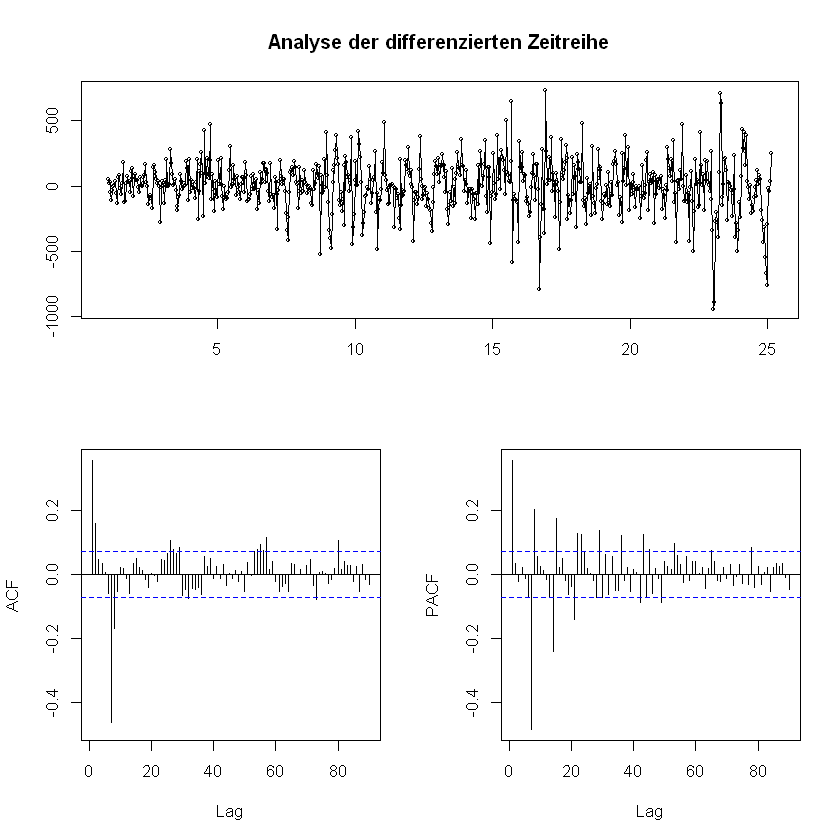

In [28]:
displ = tsdisplay(count_d1, main = "Analyse der differenzierten Zeitreihe")

#### Phase 5: Fitting ARIMA

Wie die vorangegangene Untersuchung der ACF- und PACF-Plots gezeigt hat, sind die Grade 1, 2 und 7 geeignete Kandidaten für unser aufzustellendes Modell. Im Folgenden soll nun ein ARIMA-Modell aufgestellt und bewertet werden. Hierzu verwenden wir die Funktion **arima()** aus dem Paket forecast. 

> *(In diesem Paket ist auch die Funktion auto.arima() enthalten, welche uns zwar das manuelle Fitting abnimmt, jedoch zunächst keinen Lerneffekt beinhaltet. Dazu zum Schluss mehr.)*

Im vorliegenden Fall soll demnach der Grad manuell bestimmt werden.

In [44]:
fit_arima_111 = arima(deseasonal_cnt, order=c(1,1,1))

Der naheliegendste Fall ist unter Berücksichtung der Ergebnisse unserer Untersuchung in Phase 4 der Grad 1,1,1. Mit dem Attribut lag.max wird die maximal auszugebende Anzahl geplotteter Lags im ACF- und PACF-Plot gesteuert. Hier ist es notwendig, einen passenden Wert zu ermitteln. Mit lag.max=50 können wir im PACF-Plot ein Muster erkennen.

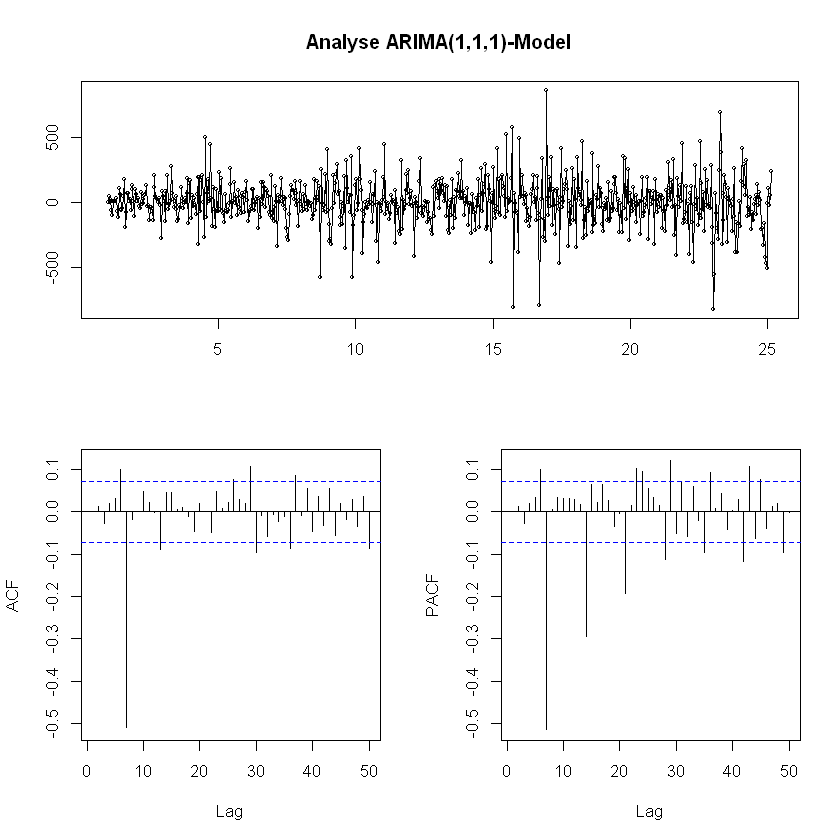

In [45]:
tsdisplay(residuals(fit_arima_111), lag.max=50, main= "Analyse ARIMA(1,1,1)-Model")

Der PACF-Plot zeigt ein Muster an jedem siebten Lag. Dies legt die Entscheidung nahe das Modell auf $q = 7$ anzupassen.

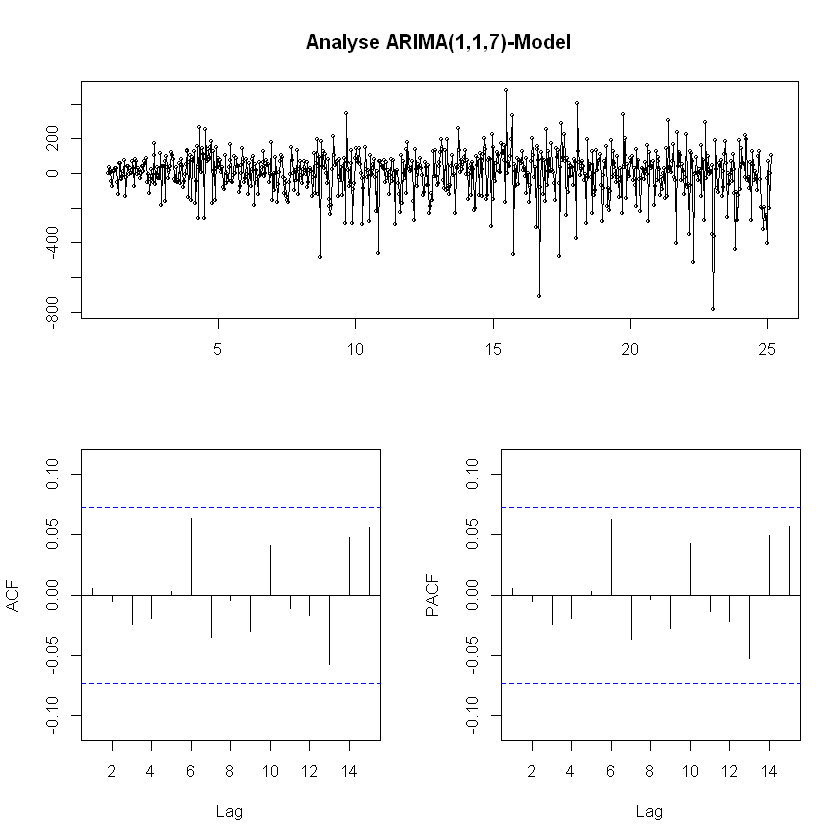

In [46]:
fit_arima_117 = arima(deseasonal_cnt, order=c(1,1,7))
tsdisplay(residuals(fit_arima_117), lag.max=15, main="Analyse ARIMA(1,1,7)-Model")

Hier sehen wir weder beim ACF-Plot noch beim PACF-Plot Auffälligkeiten von statistischer Signifikanz. Welches der beiden Modelle ist nun für unsere Prognose besser? Um dies zu bewerten gibt es den AIC (*Akaike Information Criterion*) und BIC(*Bayesian Information Criterion*) Wert. AIC und BIC sind Maße für den Informationsgehalt. Diese Kennzahlen sind nur im direkten Vergleich zwischen Modellen aussagefähig. Je kleiner/negativer der Wert, desto besser ist das Modell.

In [47]:
fit_arima_111


Call:
arima(x = deseasonal_cnt, order = c(1, 1, 1))

Coefficients:
         ar1      ma1
      0.4341  -0.0888
s.e.  0.0887   0.0974

sigma^2 estimated as 31089:  log likelihood = -4772.13,  aic = 9550.25

In [48]:
fit_arima_117


Call:
arima(x = deseasonal_cnt, order = c(1, 1, 7))

Coefficients:
         ar1     ma1     ma2     ma3     ma4     ma5     ma6      ma7
      0.3265  0.1281  0.1281  0.0998  0.1046  0.1081  0.1195  -0.8597
s.e.  0.0449  0.0249  0.0242  0.0233  0.0234  0.0237  0.0239   0.0249

sigma^2 estimated as 16737:  log likelihood = -4558.1,  aic = 9134.2

Man kann im Vergleich der AIC feststellen, dass das Modell mit der Ordnung (1,1,7) besser als jenes der Ordnung (1,1,1). Dieses Ergebnis genügt uns an dieser Stelle. Im Folgenden werden wir nun die Prognose mittels der Funktion **forecast()** erstellen.

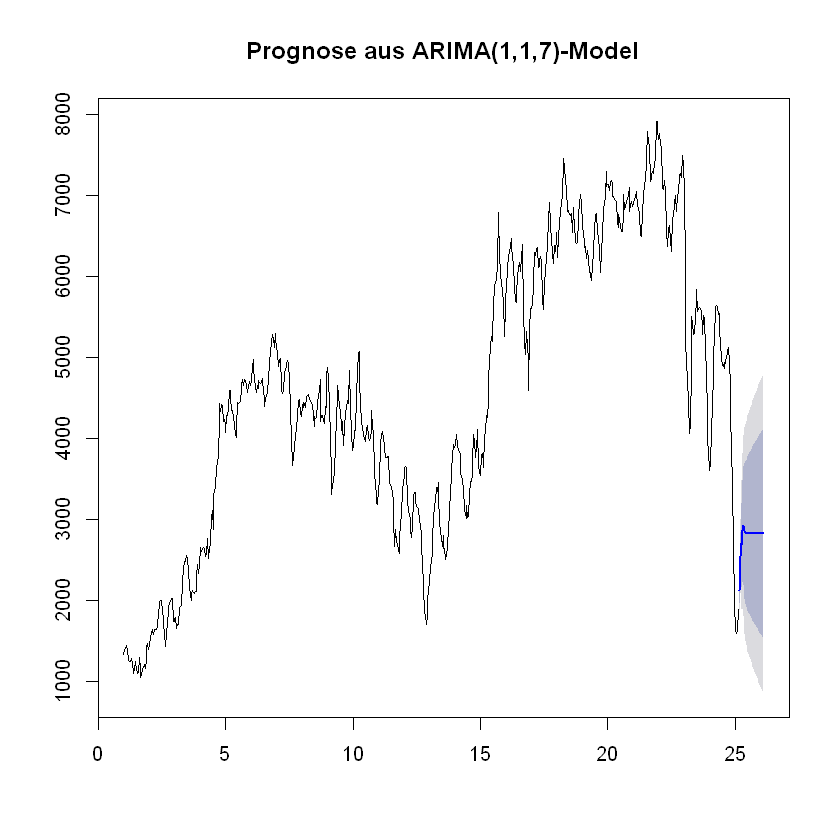

In [21]:
prediction = forecast(fit_arima_117, h=30)
plot(prediction, main = "Prognose aus ARIMA(1,1,7)-Model")

#### Appendix: Testen & Verbesserung des Modells

Das Ergebnis unserer Prognose ist oben in blauer Farbe zu sehen. Wie präzise ist unsere Vorhersage? Eine einfache Methode wäre hier das Aussparen eines Monats am Ende der Zeitreihe. Diesen Teil lassen wir uns von ARIMA prognostizieren und bekommen durch den Vergleich mit den vorliegenden, zurückgehaltenen Daten einen Eindruck von der Güte des Modells.

In [1]:
test = window(ts(deseasonal_cnt), start=700)

fit_train = arima(ts(deseasonal_cnt[-c(700:725)]), order=c(1,1,7))

prediction_test <- forecast(fit_train,h=25)
plot(prediction_test, main="Prognose aus ARIMA(1,1,7)-Model mit window", ylim=c(0,8000))
lines(ts(deseasonal_cnt))

ERROR: Error in is.data.frame(data): Objekt 'deseasonal_cnt' nicht gefunden


Im theoretischen Teil haben wir bereits den *Box-Jenkins-Methode* zur Schätzung der Grade kennengelernt. Eine Möglichkeit zur Verbesserung des Modells besteht nun darin, verschiedene Modelle unterschiedlicher Grade aufzustellen und mittels der Kennzahlen das Beste auszuwählen. Hier gehen wir am einfachsten schon von unserem besten Modell, dem (1,1,7) aus:

In [60]:
## Modelle mit steigendem p
arima117 = arima(deseasonal_cnt,order=c(1,1,7))
arima217 = arima(deseasonal_cnt,order=c(2,1,7))
arima317 = arima(deseasonal_cnt,order=c(3,1,7))
arima417 = arima(deseasonal_cnt,order=c(4,1,7))
arima517 = arima(deseasonal_cnt,order=c(5,1,7))
arima617 = arima(deseasonal_cnt,order=c(6,1,7))
arima717 = arima(deseasonal_cnt,order=c(7,1,7))

p = (c(arima117$aic, arima217$aic, arima317$aic, arima417$aic, arima517$aic, arima617$aic, arima717$aic))

p ##keine Verbesserung möglich.

arima118 = arima(deseasonal_cnt,order=c(1,1,8))
arima119 = arima(deseasonal_cnt,order=c(1,1,9))
arima219 = arima(deseasonal_cnt,order=c(2,1,9))

q = (c(arima118$aic, arima119$aic, arima219$aic))

q ##keine Verbesserung möglich.

[1] 9134.197 9135.983 9137.246 9139.051 9140.914 9141.389 9141.257

[1] 9136.022 9137.594 9138.969

Wie man unschwer aus dem obigen Beispiel mit 'Fenster' erkennt, ist hier eine gewisse Abweichung zu verzeichnen. Auch fällt es auf, dass die Prognose quasi waagerecht verläuft. Dies ist schlichtweg unrealistisch, da man in der vorliegenden Zeitreihe zu keinem Zeitpunkt einen waagerechten Verlauf verzeichnet hat. 

Das Raten von Modellgraden hat zu keiner weiteren Verbesserung geführt.

Das Verhalten lässt sich zweifelsfrei dadurch erklären, dass hier saisonale Einflüsse nicht berücksichtigt werden (können). Des Weiteren wird hier 'nur' die Zeit berücksichtigt. Der Verleih von Fahrrädern unterliegt neben saisonalen Schwankungen (z.B. Jahreszeit) auch weiteren Einflüssen, wie beispielsweise dem Wetter.

Das ARIMA-Modell kann hierfür als Ausgangsbasis herangezogen werden. Exemplarisch wollen wir an dieser Stelle noch eine Saison in das Modell rückführen. Hierbei wird auf das Attribut *seasonal* der Funktion auto.arima() zurückgegriffen.

In [23]:
fit_auto = auto.arima(deseasonal_cnt, seasonal=TRUE)

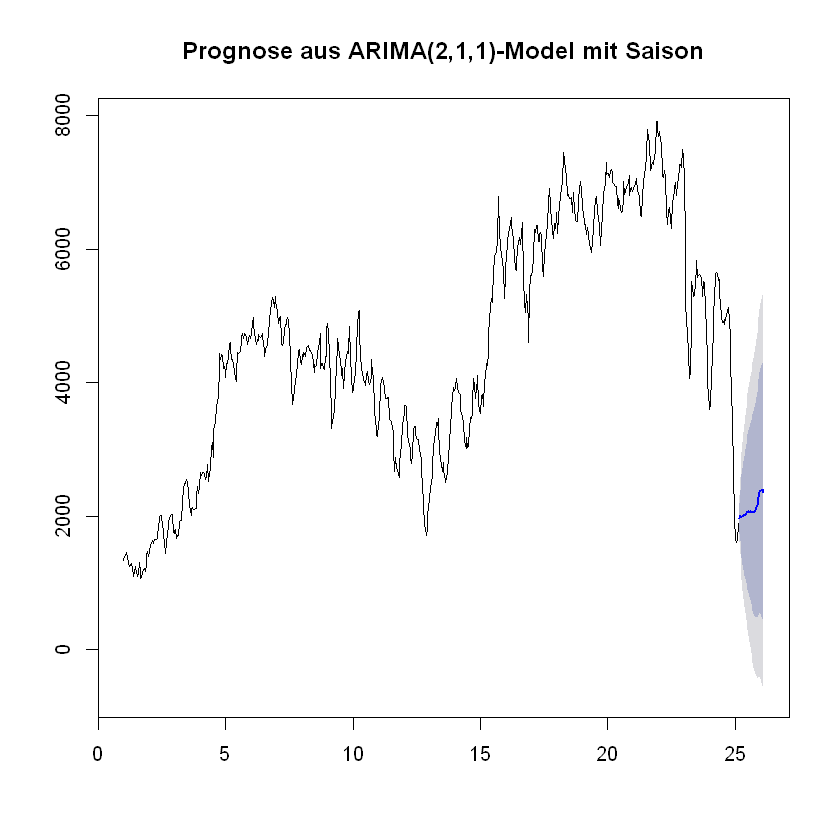

In [24]:
prediction_seasonal = forecast(fit_auto, h=30)
plot(prediction_seasonal,  main = "Prognose aus ARIMA(2,1,1)-Model mit Saison")

In [25]:
fit_auto

Series: deseasonal_cnt 
ARIMA(2,1,1)(1,0,0)[30]                    

Coefficients:
          ar1     ar2     ma1     sar1
      -0.5176  0.3842  0.8740  -0.0951
s.e.   0.0462  0.0346  0.0348   0.0375

sigma^2 estimated as 30330:  log likelihood=-4761.35
AIC=9532.71   AICc=9532.79   BIC=9555.63

Vergleichen wir den AIC Wert mit unseren beiden anderen Modellen, so sehen wir, dass auto.arima uns zwar das manuelle Fitting ersparen kann, jedoch nicht unbedingt das optimale Modell ermittelt. Basierend auf unserem Evaluationskriterium (AIC) haben wir hier sogar eine Verschlechterung erzielt. Die Prognose ist unter Hinzunahme der Saison jedoch deutlich realistischer geworden. <br> <br> Auf dieser Erkenntnis bauen wir weiter auf und führen die Saisonkomponente in das bisher *beste Modell* vom Grad (1,1,7) zurück:

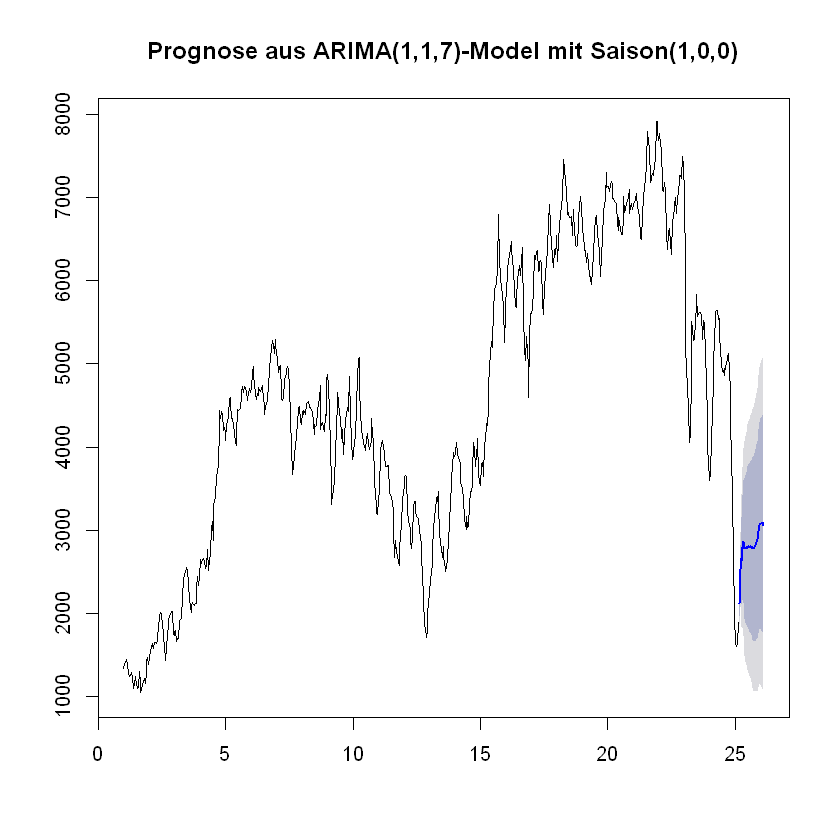

In [66]:
fit_seas117 = arima(deseasonal_cnt, order=c(1,1,7), seasonal=c(1,0,0))
prediction_seas117 = forecast(fit_seas117, h=30)
plot(prediction_seas117,  main = "Prognose aus ARIMA(1,1,7)-Model mit Saison(1,0,0)")

Durch die Hinzunahme der Saison in unser zuvor "bestes" Modell haben wir eine weitere Verbesserung des Ursprünglichen erreicht. Dies lässt sich auch beim Betrachten der Prognoselinie objektiv bestätigen. Der prognostizierte Verlauf ist im Vergleich deutlich realistischer geworden. <br> <br> 
Bei Betrachten des AIC haben wir zum automatisch gefitteten Modell eine wesentliche Verbesserung erzielen können. Im direkten Vergleich der "besten" Modelle (mit und ohne Saison) haben wir eine moderate Verbesserung:

In [64]:
fit_seas117$aic; arima117$aic

[1] 9131.476

[1] 9134.197

An dieser Stelle kann man nun weiter ansetzen. Hier bietet sich sowohl das systematische Raten (s.o.), wie auch eine tiefgründige datengestützte Analyse des Modells an. Eine weitere Verbesserung ist hier durchaus noch möglich.

##### Verwendete Literatur:


Schlittgen, R. (2015). Angewandte Zeitreihenanalyse mit R. München/Berlin/Boston: Walter de Gruyter GmbH.

Backhaus, K., Erichson, B., Plinke, W., Weiber, R. (2016). Multivariate Analysemethoden. Berlin/Heidelberg: Springer Gabler.

Heinrich, G. (2012). Basiswissen Mathematik, Statistik und Operations Research für Wirtschaftswissenschaftler. München: Oldenbourg Wissenschaftsverlag GmbH

**Verwendete Websites:**


| Link |   Beschreibung         | Zusatz|
| :------------- |:-------------|:----|
|https://www.otexts.org/fpp | Forecasting: principles and practise|(**Open Book**)|
|https://www.jmp.com/support/help/13-1/Likelihood_AICc_and_BIC.shtml | AIC und BIC||
|http://www.sciencedirect.com/science/article/pii/S2212977414000064 | Beispiel zu AIC und BIC Estimation ||
|https://onlinecourses.science.psu.edu/stat510/| Onlinecourse Time Series Analysis | (**For Free**)|



##### Verwendetes Datenset:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.